## **Unsupervised learning model: Kmeans Clustering**

Benhur Tedros

In [143]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [144]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project'

In [145]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.shape

(6810, 98)

In [146]:
# Subsetting the features needed for the prediction
# feature_select = pd.DataFrame(data.iloc[:,[0,1,2,4,9,11,13,14,16,17,18,19,20,25,27,29,32,33,36,38,39,40,41,42,43,44,46,48,
#                                            49,51,52,53,54,55,57,58,59,60,61,71,72,73,74,77,80,84,85,86,87,91,94]])
feature_select= pd.DataFrame(data.iloc[:,[1,2,4,9,11,13,14,16,17,18,19,20,25,27,33,44,46,53,57,58,59,60,61,
                                           74,77,80,87,91,94]])
feature_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
Network                                                                                    6810 non-null int64
Facility Name                                                                              6810 non-null object
Five Star                                                                                  6017 non-null float64
State                                                                                      6810 non-null object
County                                                                                     6810 non-null object
Profit or Non-Profit                                                                       6810 non-null object
Chain Owned                                                                                6810 non-null bool
Late Shift                                                                                 6810 non-null bool
#

In [147]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Facility Name':'facility_name','Profit or Non-Profit':'Profit_YesNo','Five Star':'five_star','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home','Chain Owned':'chain_owned','Late Shift':'late_shift',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate',
                                      'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 

features_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
Network                     6810 non-null int64
facility_name               6810 non-null object
five_star                   6017 non-null float64
State                       6810 non-null object
County                      6810 non-null object
Profit_YesNo                6810 non-null object
chain_owned                 6810 non-null bool
late_shift                  6810 non-null bool
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null bool
perit_incenter              6810 non-null bool
hemoTrain_home              6810 non-null bool
Medicare_Patient_Hgb<10     5952 non-null object
Medicare_Patient_Hgb>12     5952 non-null object
HD_Patient_Kt/V >= 1.2      6066 non-null object
Pat_AV_fistulae             6149 non-null object
Pat_Vasc-Catheter_90days    6149 non-null object
Pat_hypercalcemia           6412 non-null object
SerumPhos_<3.5mg/dL   

In [148]:
## regrouping the columns to line up the predictor variables together and 
# move the mortality rate(the response variable) to the last column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(0, cols.pop(cols.index('facility_name')))
cols.insert(4,cols.pop(cols.index("five_star")))


# To reorder the columns
features_all = features_all.ix[:, cols]
features_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
facility_name               6810 non-null object
Network                     6810 non-null int64
State                       6810 non-null object
County                      6810 non-null object
five_star                   6017 non-null float64
Profit_YesNo                6810 non-null object
chain_owned                 6810 non-null bool
late_shift                  6810 non-null bool
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null bool
perit_incenter              6810 non-null bool
hemoTrain_home              6810 non-null bool
Medicare_Patient_Hgb<10     5952 non-null object
Medicare_Patient_Hgb>12     5952 non-null object
HD_Patient_Kt/V >= 1.2      6066 non-null object
Pat_AV_fistulae             6149 non-null object
Pat_Vasc-Catheter_90days    6149 non-null object
Pat_hypercalcemia           6412 non-null object
SerumPhos_<3.5mg/dL   

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


In [149]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['chain_owned']=numeric.fit_transform(features_all['chain_owned'].astype('str'))
features_all['late_shift']=numeric.fit_transform(features_all['late_shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['Network']=numeric.fit_transform(features_all['Network'].astype('str'))
features_all['County']=numeric.fit_transform(features_all['County'].astype('str'))


In [150]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')
   

## EDA

In [151]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from scipy.stats import norm

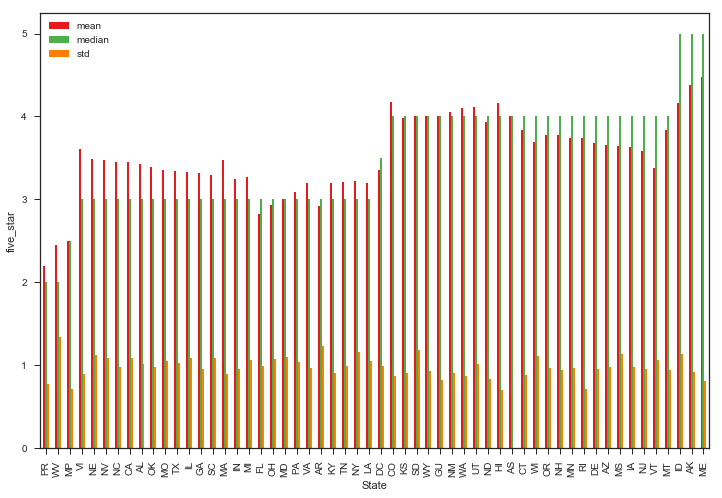

In [152]:
mort_state = features_all.groupby('State',as_index=True)['five_star'].agg(['mean', 'median','std'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')
colors = plt.cm.Set1(np.linspace(0,1,5))
mort_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('five_star')

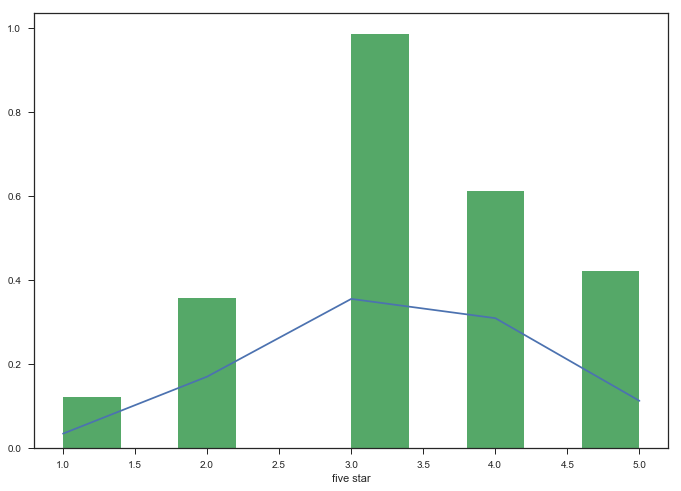

In [153]:
x = features_all[features_all['five_star'].notnull()]
newx = list(x['five_star'])
newx.sort()
xmean = np.mean(newx)
xstd = np.std(newx)
pdf1 = norm.pdf(newx, xmean, xstd)

plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
plt.plot(newx, pdf1)
plt.hist(newx,normed=True)
plt.xlabel('five star')

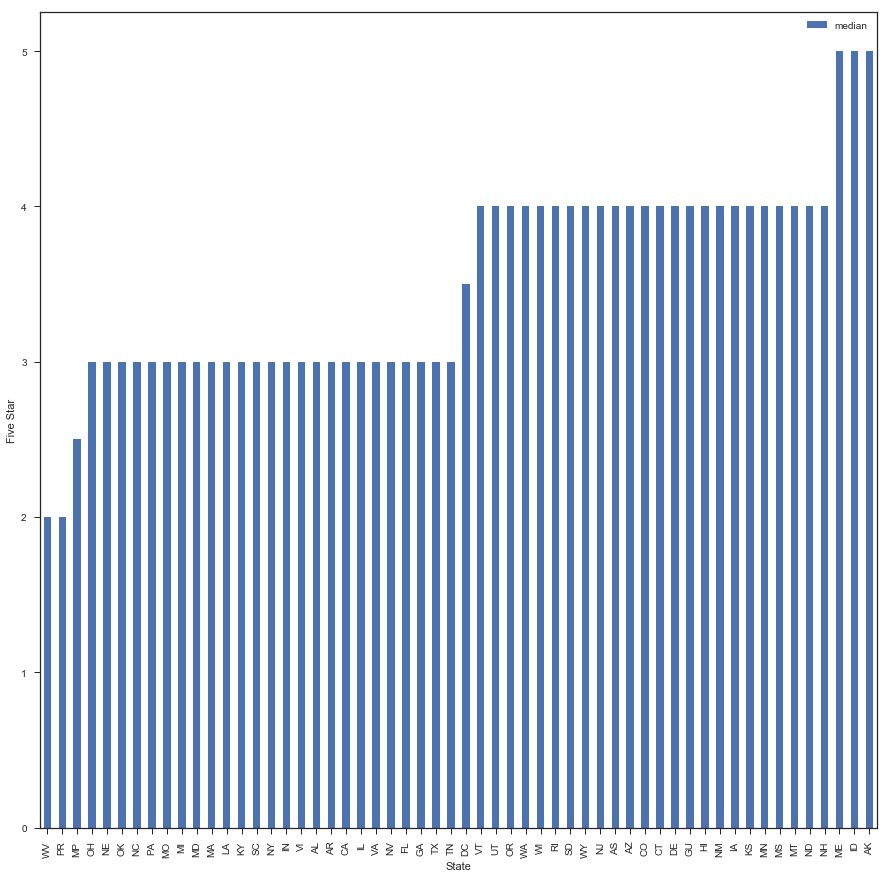

In [154]:
# Exploring the mortality rate against the Five star reviews
# total_mortRate['State']=numeric.fit_transform(total_mortRate['State'].astype('str'))
star = features_all.groupby('State',as_index=True)['five_star'].agg(['median'])
star = star.sort_values(by='median')
colors = plt.cm.viridis(np.linspace(0,1,5))
star.plot.bar(stacked=True, figsize=(15,15)).set_ylabel('Five Star')

In [155]:
# # Comparing the trend of the five star variable to the other features

# features_all['State']=numeric.fit_transform(features_all['State'].astype('str'))
# list(total_mortRate).index('five_star')


# test1 = features_all.iloc[:, np.r_[1:12,46]]
# scatter_matrix(test1, alpha=0.2, figsize=(20, 20), diagonal='hist');

# test2 = features_all.iloc[:, np.r_[12:24,46]]
# scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist');

# test3 = total_mortRate.iloc[:, np.r_[24:36,46]]
# scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist');

# test4 = total_mortRate.iloc[:, np.r_[36:46,46]]
# scatter_matrix(test4, alpha=0.2, figsize=(20, 20), diagonal='hist');

# # sns.set(style="whitegrid", color_codes=True)
# # sns.regplot(x="five_star", y="Hospitalization_rate", data=total_mortRate);

In [156]:
# X_col = total_mortRate.columns[1:46]
# bins = np.arange(0, 5, 5)

# # g = sns.FacetGrid(total_mortRate,col="Medicare_Patient_Hgb>12",row="five_star")
# # g.map(plt.hist,'five_star', bins=bins,color='r')


# # # g = sns.PairGrid(total_mortRate,x_vars=X_col, y_vars=["five_star"])
# sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(total_mortRate,y_vars=["five_star"],x_vars=X_col,kind='scatter')
# # g = sns.PairGrid(total_mortRate)
# # g = g.map(plt.scatter)
# g.fig.subplots_adjust(wspace=1, hspace=1)

## Model Fitting

### KMeans clustering

In [172]:
# Loading the necessary libraries
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [213]:
# Selecting the features
features_all['State']=numeric.fit_transform(features_all['State'].astype('str'))
X_col = features_all.columns[1:]
features = features_all[X_col]

# Create our imputer to replace missing values with the median 
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_feature = imp.fit_transform(features)

# # Converting into data frame
# imp_feature=pd.DataFrame(imp_feature)
# imp_feature.head()

# Standarizing the dataset
X_scaled = pd.DataFrame(StandardScaler().fit_transform(imp_feature))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.320132,0.068761,0.567652,-0.299134,0.386982,0.378915,-0.456168,-0.873333,0.241402,-1.037105,...,0.000033,-0.037876,-0.018883,-0.141644,-0.068081,0.005275,-0.094695,0.107177,-0.193247,-0.153696
1,-0.803342,-1.602105,-0.391111,-0.299134,0.386982,0.378915,-0.456168,-0.638759,0.241402,0.964223,...,0.000033,-0.037876,-0.018883,-0.141644,-0.068081,0.005275,-0.094695,0.107177,-0.193247,-0.153696
2,-1.365079,-0.348956,0.158026,-0.299134,0.386982,0.378915,-0.456168,0.768687,0.241402,-1.037105,...,0.000033,-0.037876,-0.018883,-0.141644,-0.068081,0.005275,-0.094695,0.107177,-0.193247,-0.153696
3,1.443607,-0.766672,0.003674,-0.299134,0.386982,0.378915,-0.456168,-0.638759,0.241402,-1.037105,...,0.000033,-0.037876,-0.018883,-0.141644,-0.068081,0.005275,-0.094695,0.107177,-0.193247,-0.153696
4,-0.616096,0.426803,0.196614,-0.299134,0.386982,0.378915,-0.456168,-1.107907,-4.142463,0.964223,...,0.000033,-0.037876,-0.018883,-0.141644,-0.962139,0.005275,-1.334477,0.107177,-0.193247,-0.153696


In [214]:
# Splitting the dataset into two, and later to evaluate the clustering centroids from the two Kmeans clustering results
data_1, data_2= train_test_split(imp_feature, test_size = 0.2, random_state = 1234)

k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=1234)
    pred =model.fit_predict(data_1)
    silhouette_avg = silhouette_score(data_1,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.56
The number of clusters, 3, and silhouette coefficient is 0.51
The number of clusters, 4, and silhouette coefficient is 0.45
The number of clusters, 5, and silhouette coefficient is 0.42
The number of clusters, 6, and silhouette coefficient is 0.40
The number of clusters, 7, and silhouette coefficient is 0.36
The number of clusters, 8, and silhouette coefficient is 0.34
The number of clusters, 9, and silhouette coefficient is 0.31
The number of clusters, 10, and silhouette coefficient is 0.31


In [219]:
# Using PCA for dimensionality reduction
P= PCA(n_components=6)
dim_redu =P.fit_transform(data_1)

# fit to the kmeans model

km =  KMeans(n_clusters=2)
pred = km.fit_predict(dim_redu)


# adding the PC1 and PC2 to the exsting data frame
data_1 = pd.DataFrame(data_1)
data_1['x']= P.fit_transform(data_1)[:,0]
data_1['y']= P.fit_transform(data_1)[:,1]
data_1['pred_cluster']= pred

# converting cluster into str nature for the plotting purposes
data_1['pred_cluster'] = data_1['pred_cluster'].astype('str')

print(data_1.pred_cluster.value_counts())

1    2871
0    2577
Name: pred_cluster, dtype: int64


In [185]:
! pip install ggplot

from ggplot import *

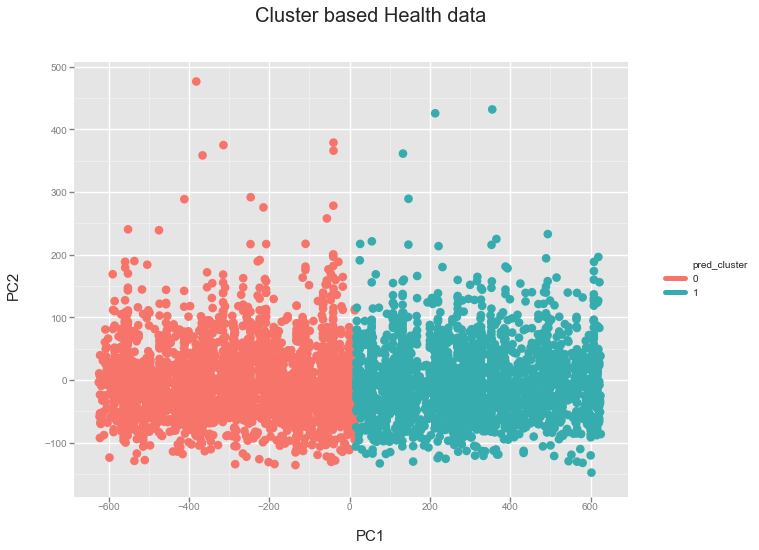

<ggplot: (-9223372032277167507)>

In [165]:
ggplot(data_1,aes('x','y',color='pred_cluster')) + geom_point(size=75) + ggtitle(element_text(text='Cluster based Health data', size=20)) + \
       xlab(element_text(size=15, text='PC1')) + ylab(element_text(size=15, text='PC2')) 